In [13]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost
from sklearn.svm import SVR
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [14]:
%cd "/home/aloysius/repos/Code and Dataset/Dataset"

/home/aloysius/repos/Code and Dataset/Dataset


/home/aloysius/anaconda3/envs/DataAnalytics/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [15]:
df = pd.read_csv("login_trades_symbol_updated.csv")
df = df.dropna()
df.head()

,login,country,account_currency,reg_date,ticket,symbol,description,type,cmd,volume,open_time,open_price,open_price_usd,close_time,close_price_usd,tp,sl,reason,commission,commission_usd,swaps,swaps_usd,profit,profit_usd,volume_usd,dpm
0,7062462,Latvia,EUR,2023-12-22 18:51:59,68880703,XAUUSD,Gold vs US Dollar,Metal,0,0.01,2024-02-13 17:05:41,1991.35000,2135.902096,2024-02-15 16:05:14,2157.542221,0.00000,0.00000,1,0.00,0.00,-1.12,-1.206408,10.83,11.665534,3994.36,4.659634
1,7062462,Latvia,EUR,2023-12-22 18:51:59,68880910,XAUUSD,Gold vs US Dollar,Metal,0,0.02,2024-02-13 17:08:49,1990.30000,2134.775877,2024-02-15 16:05:10,2157.272934,0.00000,0.00000,1,0.00,0.00,-2.25,-2.423588,23.16,24.946794,7986.12,9.961405
2,813125,United Kingdom,GBP,2023-05-20 18:43:18,68120690,US2000,US Small Cap 2000 Cash,Index,0,1.00,2024-01-24 07:56:45,1983.22000,2523.468960,2024-01-24 16:41:43,2537.221210,2012.34000,1980.03000,1,0.00,0.00,0.00,0.000000,105.42,133.959302,39799.00,5.331446
3,813125,United Kingdom,GBP,2023-05-20 18:43:18,68169249,US2000,US Small Cap 2000 Cash,Index,0,2.00,2024-01-24 23:36:11,1960.62000,2491.399046,2024-01-25 16:29:03,2529.297360,2331.85000,1958.94000,1,0.00,0.00,-7.21,-9.156988,485.26,616.299610,79042.60,24.356962
4,88945036,Nigeria,USD,2023-05-01 04:36:26,68186877,NZDUSD,New Zealand Dollar vs US Dollar,Forex,0,0.13,2024-01-25 08:00:00,0.61062,0.610620,2024-01-25 15:38:26,0.613170,0.61312,0.55059,1,-0.91,-0.91,0.00,0.000000,33.15,33.150000,15909.27,4.056864


In [16]:
label_encoder = preprocessing.LabelEncoder()
df["country"]= label_encoder.fit_transform(df["country"])
df["account_currency"]= label_encoder.fit_transform(df["account_currency"])
df["symbol"]= label_encoder.fit_transform(df["symbol"])
df["type"]= label_encoder.fit_transform(df["type"])
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[["volume"]] = scaler.fit_transform(df[["volume"]])
df[["open_price_usd"]] = scaler.fit_transform(df[["open_price_usd"]])
df[["tp"]] = scaler.fit_transform(df[["tp"]])
df[["sl"]] = scaler.fit_transform(df[["sl"]])
df.head()

,login,country,account_currency,reg_date,ticket,symbol,description,type,cmd,volume,open_time,open_price,open_price_usd,close_time,close_price_usd,tp,sl,reason,commission,commission_usd,swaps,swaps_usd,profit,profit_usd,volume_usd,dpm
0,7062462,86,3,2023-12-22 18:51:59,68880703,106,Gold vs US Dollar,4,0,0.000000,2024-02-13 17:05:41,1991.35000,0.026408,2024-02-15 16:05:14,2157.542221,0.000000e+00,0.000000e+00,1,0.00,0.00,-1.12,-1.206408,10.83,11.665534,3994.36,4.659634
1,7062462,86,3,2023-12-22 18:51:59,68880910,106,Gold vs US Dollar,4,0,0.000026,2024-02-13 17:08:49,1990.30000,0.026394,2024-02-15 16:05:10,2157.272934,0.000000e+00,0.000000e+00,1,0.00,0.00,-2.25,-2.423588,23.16,24.946794,7986.12,9.961405
2,813125,162,4,2023-05-20 18:43:18,68120690,79,US Small Cap 2000 Cash,3,0,0.002571,2024-01-24 07:56:45,1983.22000,0.031200,2024-01-24 16:41:43,2537.221210,4.310245e-05,9.204082e-05,1,0.00,0.00,0.00,0.000000,105.42,133.959302,39799.00,5.331446
3,813125,162,4,2023-05-20 18:43:18,68169249,79,US Small Cap 2000 Cash,3,0,0.005169,2024-01-24 23:36:11,1960.62000,0.030803,2024-01-25 16:29:03,2529.297360,4.994606e-05,9.106046e-05,1,0.00,0.00,-7.21,-9.156988,485.26,616.299610,79042.60,24.356962
4,88945036,112,7,2023-05-01 04:36:26,68186877,72,New Zealand Dollar vs US Dollar,2,0,0.000312,2024-01-25 08:00:00,0.61062,0.000007,2024-01-25 15:38:26,0.613170,1.313246e-08,2.559393e-08,1,-0.91,-0.91,0.00,0.000000,33.15,33.150000,15909.27,4.056864


In [17]:
df.drop(columns=["login","reg_date","ticket","description","open_time",
                 "open_price","close_time","close_price_usd","commission",
                 "commission_usd","swaps","swaps_usd","profit","profit_usd",
                "volume_usd","country","account_currency","type"],inplace=True)
df.head()

,symbol,cmd,volume,open_price_usd,tp,sl,reason,dpm
0,106,0,0.000000,0.026408,0.000000e+00,0.000000e+00,1,4.659634
1,106,0,0.000026,0.026394,0.000000e+00,0.000000e+00,1,9.961405
2,79,0,0.002571,0.031200,4.310245e-05,9.204082e-05,1,5.331446
3,79,0,0.005169,0.030803,4.994606e-05,9.106046e-05,1,24.356962
4,72,0,0.000312,0.000007,1.313246e-08,2.559393e-08,1,4.056864


# Split Data

In [25]:
X = df.iloc[:,0:7]
y = df.iloc[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

# Linear Regresssion

In [26]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

-0.00017181963352475016


In [27]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

37195127342.291885

In [28]:
y_pred

array([[ 646.96766806],
       [   9.29302734],
       [ -13.38012332],
       ...,
       [1141.24189894],
       [ 776.07874423],
       [1419.76469628]])

In [29]:
y_test

,dpm
246112,2.851489
3950785,13.133757
1245313,-0.326223
3874913,5.849889
3892266,-0.147299
...,...
711606,-0.605937
2210456,0.430965
3031852,-1.711047
1451180,0.000000


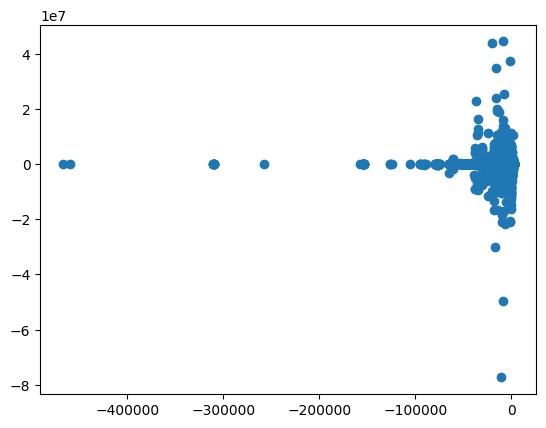

In [30]:
plt.scatter(y_pred,y_test)

# Random Forest

In [11]:
rf = RandomForestRegressor(verbose=1)
rf.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 21.2min


RandomForestRegressor(verbose=1)

In [12]:
y_pred = rf.predict(X_test)
mean_squared_error(y_test,y_pred)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   31.9s


30753059384.324448

In [13]:
y_pred

array([-3.75030536e-01,  1.44676341e+00, -2.68539860e-01, ...,
       -1.71891082e+00,  3.35652941e-07, -2.85483782e-02])

In [14]:
y_test

,dpm
246112,2.851489
3950785,13.133757
1245313,-0.326223
3874913,5.849889
3892266,-0.147299
...,...
711606,-0.605937
2210456,0.430965
3031852,-1.711047
1451180,0.000000


# SVM

In [ ]:
svr = SVR()
svr.fit(X_train,y_train)